### Clustering 
1) k Means Clustering
2) Hierarchical Clustering

Using the Mall dataset, clustering all the customers into meaningful clusters.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
import joblib
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

### Load the Dataset
Check for missing and duplicates

In [15]:
df = pd.read_csv(r"D:\lums\work stuff\notebooks\Week3\Mall_Customers.csv")
df.drop(columns=['CustomerID'], inplace=True)
# One hot encode Gender as label encoding would introduce false distances
df_encoded = pd.get_dummies(df, columns=['Genre'], drop_first=True).astype(int)
df = df_encoded
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [16]:
# Check for missing and duplicate values

print("Missing values:\n", df.isnull().sum())
print("\n Duplicate values:", df.duplicated().sum())

Missing values:
 Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Genre_Male                0
dtype: int64

 Duplicate values: 0


In [17]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


### Elbow Method

To find the optimal K value for clustering

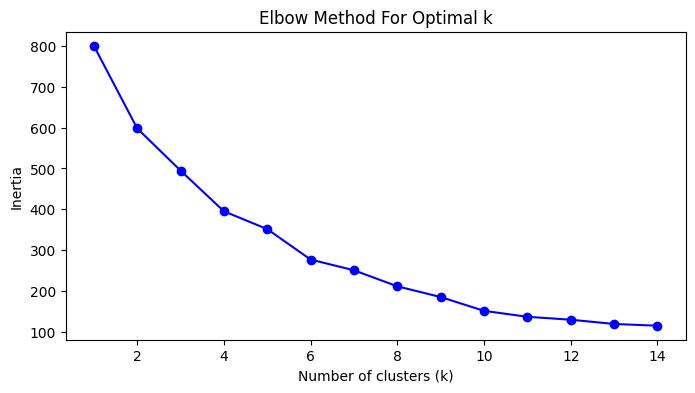

In [18]:
inertia = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that 5 or 6 clusters seems to be the most appropriate therefore we will try both and see.

In [31]:
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Optional: Check cluster centers
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

Cluster Centers (scaled):
[[ 3.87201602e-01  7.80096711e-02  2.35419804e-01  1.12815215e+00
   1.55431223e-15]
 [-4.77931979e-01  9.72847870e-01  1.22158511e+00 -8.86405260e-01
   3.00000000e+00]
 [-1.02745977e+00 -1.15373461e+00  6.54790324e-01  1.12815215e+00
   4.00000000e+00]
 [ 8.57285729e-01 -3.38007645e-01 -5.18620759e-01 -8.86405260e-01
   1.00000000e+00]
 [ 7.22793089e-02  1.00192934e+00 -1.39979456e+00  1.03222084e+00
   5.00000000e+00]
 [-8.81192425e-01 -1.19372163e+00  6.20775242e-01 -8.86405260e-01
   1.95238095e+00]
 [-6.32264536e-01  4.65667036e-01 -3.50946909e-01 -8.86405260e-01
   3.00000000e+00]]


### PCA for visualization

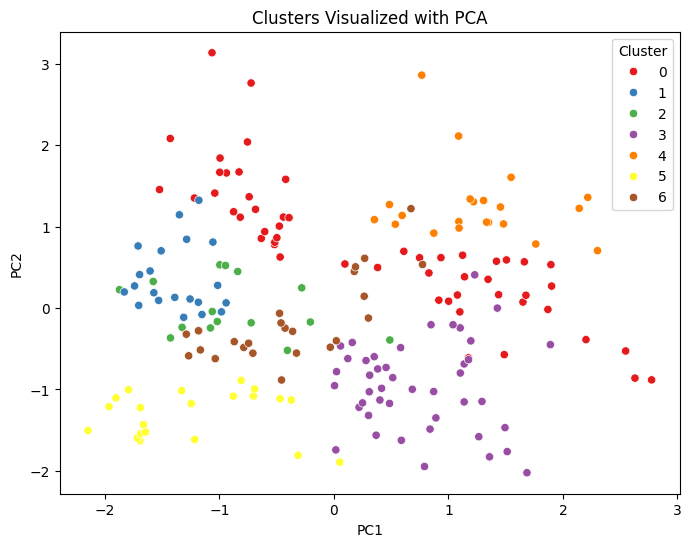

In [32]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop(columns=['Cluster'], axis=1))

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Clusters Visualized with PCA')
plt.show()

In [26]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)  # Use your scaled features
    score = silhouette_score(df, labels)
    print(f"k = {k}, silhouette score = {score:.3f}")

k = 2, silhouette score = 0.373
k = 3, silhouette score = 0.391
k = 4, silhouette score = 0.377
k = 5, silhouette score = 0.458
k = 6, silhouette score = 0.481
k = 7, silhouette score = 0.483
k = 8, silhouette score = 0.421
k = 9, silhouette score = 0.451
k = 10, silhouette score = 0.487
